# Xây dựng cây quyết định và rừng cây trên dữ liệu bệnh tiểu đường

### Cài đặt thư viện

In [73]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
#Dòng tiếp theo giúp hiển thị các biểu đồ
%matplotlib inline
import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 400 
import graphviz 

# Set the decimal format
pd.options.display.float_format = "{:.2f}".format

### Tải và Khám phá Dữ liệu (Initial EDA)

In [74]:
df = pd.read_csv('../datasets/diabetes_prediction_dataset.csv') 
features_response = df.columns.tolist()
features_response

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'smoking_history',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'diabetes']

Các biến trong tập dữ liệu diabetes_prediction_dataset.csv có ý nghĩa như sau:

1. **age (Tuổi)**:
Tuổi là yếu tố quan trọng ảnh hưởng đến nguy cơ mắc tiểu đường. Khi tuổi tăng, hoạt động thể chất giảm, hormone thay đổi, và khả năng mắc các bệnh mạn tính khác cao hơn — tất cả đều làm tăng nguy cơ tiểu đường.

2. **gender (Giới tính)**:
Giới tính có ảnh hưởng đến nguy cơ mắc bệnh. Phụ nữ từng bị tiểu đường thai kỳ có nguy cơ cao mắc tiểu đường type 2 sau này, trong khi nam giới nhìn chung có xu hướng mắc tiểu đường cao hơn một chút.

3. **bmi (Chỉ số khối cơ thể)**:
BMI đo lường lượng mỡ cơ thể dựa trên chiều cao và cân nặng. Chỉ số BMI cao thường đồng nghĩa với béo phì – yếu tố làm tăng nguy cơ tiểu đường type 2 do gây kháng insulin và rối loạn điều hòa đường huyết.

4. **hypertension (Tăng huyết áp)**:
Cao huyết áp và tiểu đường thường đi kèm nhau vì có chung các yếu tố nguy cơ như béo phì, ít vận động và rối loạn chuyển hóa. Người bị tăng huyết áp có khả năng mắc tiểu đường cao hơn.

5. **heart_disease (Bệnh tim)**:
Có mối quan hệ hai chiều giữa bệnh tim và tiểu đường. Người bị bệnh tim có nguy cơ cao phát triển tiểu đường và ngược lại, do cả hai cùng chia sẻ nguyên nhân như béo phì, cao huyết áp, và cholesterol cao.

6. **smoking_history (Tiền sử hút thuốc)**:
Hút thuốc làm tăng nguy cơ tiểu đường type 2 do ảnh hưởng đến quá trình trao đổi glucose và làm giảm độ nhạy insulin. Việc bỏ thuốc lá có thể giảm đáng kể nguy cơ mắc bệnh.

7. **HbA1c_level (Mức HbA1c)**:
Chỉ số HbA1c phản ánh mức đường huyết trung bình trong 2–3 tháng gần nhất. Chỉ số cao cho thấy kiểm soát đường huyết kém và là dấu hiệu sớm của tiểu đường.

8. **blood_glucose_level (Mức đường huyết)**:
Là lượng glucose trong máu tại một thời điểm. Nếu mức đường huyết thường xuyên cao, đặc biệt là khi đói, đó là dấu hiệu rõ ràng của nguy cơ hoặc tình trạng tiểu đường.

9. **diabetes (Tiểu đường – biến mục tiêu)**:
Biến nhãn (label) của bài toán. Giá trị 1 nghĩa là người đó bị tiểu đường, 0 nghĩa là không. Đây là biến mà mô hình cần dự đoán dựa trên các đặc trưng còn lại.

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [76]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0


In [77]:
# Thống kê mô tả
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,41.89,0.07,0.04,27.32,5.53,138.06,0.09
std,22.52,0.26,0.19,6.64,1.07,40.71,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.63,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,60.00,0.00,0.00,29.58,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


**1. Dữ liệu rất "sạch"**: Hàng count (số lượng) là 100,000 cho tất cả các cột. Điều này có nghĩa là không có dữ liệu bị thiếu (missing values). Bạn không cần fillna().

**2. Dữ liệu BỊ Mất Cân Bằng (Quan trọng nhất)**: Hàng mean của cột diabetes là 0.085. Điều này có nghĩa là chỉ 8.5% bệnh nhân bị tiểu đường (Lớp 1: lớp thiểu số).

**3. Cần Chuẩn hóa (Scaling)**: Các cột có thang đo rất khác nhau (ví dụ: blood_glucose_level (max 300) so với HbA1c_level (max 9.0)).

→ Tóm lại: Dữ liệu sạch, nhưng mất cân bằng và cần chuẩn hóa.

### Tiền xử lý dữ liệu

#### Xử lý dữ liệu trùng

In [78]:
# Kiểm tra dữ liệu trùng
df.duplicated().sum()

3854

In [79]:
# Xử lý dữ liệu trùng
df = df.drop_duplicates()

### Xử lý riêng biệt


In [80]:
# Lặp qua từng cột và đếm số lượng giá trị khác biệt
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

gender: 3 distinct values
age: 102 distinct values
hypertension: 2 distinct values
heart_disease: 2 distinct values
smoking_history: 6 distinct values
bmi: 4247 distinct values
HbA1c_level: 18 distinct values
blood_glucose_level: 18 distinct values
diabetes: 2 distinct values


Tập dữ liệu có sự pha trộn giữa biến phân loại (gender, smoking_history), biến nhị phân (hypertension, heart_disease, diabetes) và biến liên tục (age, bmi, HbA1c_level, blood_glucose_level).

→ Bước tiếp theo trong xử lý dữ liệu là chuẩn hóa (scaling) các biến liên tục và mã hóa (encoding) các biến phân loại để mô hình học máy có thể xử lý hiệu quả.

In [81]:
df['gender'].value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

In [82]:
# Loại bỏ giá trị không cần thiết
df = df[df['gender'] != 'Other']
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00
mean,41.80,0.08,0.04,27.32,5.53,138.22,0.09
std,22.46,0.27,0.20,6.77,1.07,40.91,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.40,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,59.00,0.00,0.00,29.86,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


### Chuẩn hóa Dữ liệu

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# --- Bước 1: Tách X (Đặc trưng) và y (Mục tiêu) ---
# Chúng ta sẽ dự đoán 'diabetes'
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# --- Bước 2: Phân loại các cột của bạn ---
# (Chúng ta sẽ xử lý các cột này theo các cách khác nhau)

# 1. Các cột SỐ cần được CHUẨN HÓA (Scale)
numeric_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# 2. Các cột CHỮ cần được MÃ HÓA (Encode)
categorical_features = ['gender', 'smoking_history']

# 3. Các cột nhị phân (0/1) đã "sạch", cho đi qua (Passthrough)
passthrough_features = ['hypertension', 'heart_disease']


# --- Bước 3: Tạo các "đường ống" xử lý ---

# Đường ống cho dữ liệu SỐ
numeric_transformer = StandardScaler()

# Đường ống cho dữ liệu CHỮ
# OneHotEncoder sẽ biến 1 cột 'gender' (3 giá trị) thành 3 cột 0/1
categorical_transformer = OneHotEncoder(handle_unknown='ignore')


# --- Bước 4: Kết hợp các đường ống bằng ColumnTransformer ---
# Đây là "bộ não" chính, nó biết áp dụng cái gì vào cột nào
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('pass', 'passthrough', passthrough_features)
    ])

In [84]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


print(f"Kích thước X_train ban đầu: {X_train.shape}")
print(f"Kích thước X_train đã xử lý: {X_train_processed.shape}")

Kích thước X_train ban đầu: (76902, 8)
Kích thước X_train đã xử lý: (76902, 14)


#### 5 bước tiền xử lý cho dữ liệu:

1. Tách X (đặc trưng) và y (mục tiêu diabetes).

2. Phân loại 3 nhóm cột:

+ Số (age, bmi...): Cần Chuẩn hóa (Scale).

+ Chữ (gender, smoking...): Cần Mã hóa (Encode).

+ Nhị phân (hypertension...): Đã sạch, không cần xử lý.

3. Chia Train/Test: Dùng train_test_split. Bắt buộc phải dùng stratify=y vì dữ liệu bị mất cân bằng (chỉ 8.5% Lớp 1).

4. Dùng ColumnTransformer (Bộ Tiền xử lý):

+ Áp dụng StandardScaler (chuẩn hóa) cho nhóm Số.

+ Áp dụng OneHotEncoder (mã hóa) cho nhóm Chữ.

5. Huấn luyện (Fit) bộ tiền xử lý này trên X_train và dùng nó để Biến đổi (Transform) cả X_train và X_test

Chia bộ dữ liệu thành 2 phần một cách ngẫu nhiên:

+ Tập Huấn luyện (Training Set): Phần lớn dữ liệu (80%) dùng để dạy hoặc "fit" mô hình (**test_size=0.2**).

+ Tập Kiểm tra (Test Set): Phần nhỏ dữ liệu (20%) được giữ bí mật với mô hình. Nó chỉ được dùng một lần duy nhất ở cuối cùng để đánh giá xem mô hình hoạt động tốt đến đâu trên dữ liệu mới mà nó chưa từng thấy

### Các công thức sử dụng

**1. Recall (Độ nhạy hay Khả năng "Bắt" bệnh)**
**Công thức:**
    $$\text{Recall} = \frac{TP}{TP + FN}$$

**2. Precision (Độ chính xác Cảnh báo)**
**Công thức:**
    $$\text{Precision} = \frac{TP}{TP + FP}$$

**3. Specificity (Độ đặc hiệu hay Khả năng "Loại trừ")**
**Công thức:**
    $$\text{Specificity} = \frac{TN}{TN + FP}$$

Trong đó: 

**TP**: (True Positive - Dương tính Thật)

**TN**: (True Negative - Âm tính Thật)

**FP**: (False Positive - Dương tính Giả)

**FN**: (False Negative - Âm tính Giả)

**precision**: Độ chính xác Cảnh báo

**recall**:Độ nhạy / Khả năng "Bắt"

**Specificity**: Độ đặc hiệu

## 1. Xây dựng cây quyết định bằng thư viện Scikit-Learn

#### Training:
Input:

+ X_train_processed: Đây là "bài học" (các đặc trưng). Nó là ma trận dữ liệu huấn luyện đã được làm sạch, chuẩn hóa (scaled) và mã hóa (encoded) từ bộ ColumnTransformer.

+ y_train: Đây là "đáp án" (các nhãn). Nó là danh sách các kết quả (0 hoặc 1) tương ứng với từng hàng của X_train_processed

Output: Một mô hình Cây Quyết định đã được huấn luyện (fit), gọi nó là dt_model.

#### Evaluating:

Input: X_test_processed là ma trận dữ liệu kiểm tra, cũng đã được biến đổi (transform) bằng bộ tiền xử lý mà bạn đã "dạy" (fit) trên tập X_train.

Output: 
+ y_pred: Một danh sách các dự đoán (0 hoặc 1) mà mô hình của bạn đưa ra cho X_test_processed.

+ Sau đó, so sánh y_pred (kết quả dự đoán) với y_test (đáp án thật) để xem mô hình của bạn hoạt động tốt đến đâu.

### 1.1 Xây dựng cây quyết định từ lớp DecisionTreeClassifier có trong thư viện Scikit-Learn

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Cây sẽ phát triển đến độ sâu tối đa là 10
dt_model = DecisionTreeClassifier(
    random_state=42,          
    max_depth=10,            
    class_weight='balanced'  
)
dt_model.fit(X_train_processed, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=42)

Việc dùng class_weight='balanced' và max_depth=10 giúp mô hình Cây Quyết định xử lý hiệu quả hai vấn đề phổ biến trong dữ liệu mất cân bằng.

+ class_weight='balanced': Giải pháp cho dữ liệu mất cân bằng nghiêm trọng (91.5% không bệnh, 8.5% có bệnh). Tham số này tự động điều chỉnh trọng số, buộc mô hình “chú ý” hơn đến các ca có bệnh (Lớp 1). Nhờ đó, Recall tăng rõ rệt, mô hình không còn chỉ “đoán tất cả là không bệnh” để đạt độ chính xác ảo.

+ max_depth=10: Giới hạn độ sâu của cây nhằm tránh overfitting. Nếu không giới hạn, cây sẽ học thuộc dữ liệu huấn luyện, dẫn đến dự đoán kém trên dữ liệu mới. Độ sâu = 10 là mức cân bằng hợp lý — đủ để nắm bắt quy luật phức tạp nhưng vẫn duy trì khả năng tổng quát hóa tốt.

**Tóm lại**:

class_weight='balanced' → tăng khả năng phát hiện bệnh (Recall).

max_depth=10 → giảm học vẹt, tăng độ tin cậy khi dự đoán thực tế.

### 1.2 Đánh giá Mô hình trên Dữ liệu Test


--- Ma trận nhầm lẫn (Confusion Matrix) ---
[[15491  2039]
 [  161  1535]]


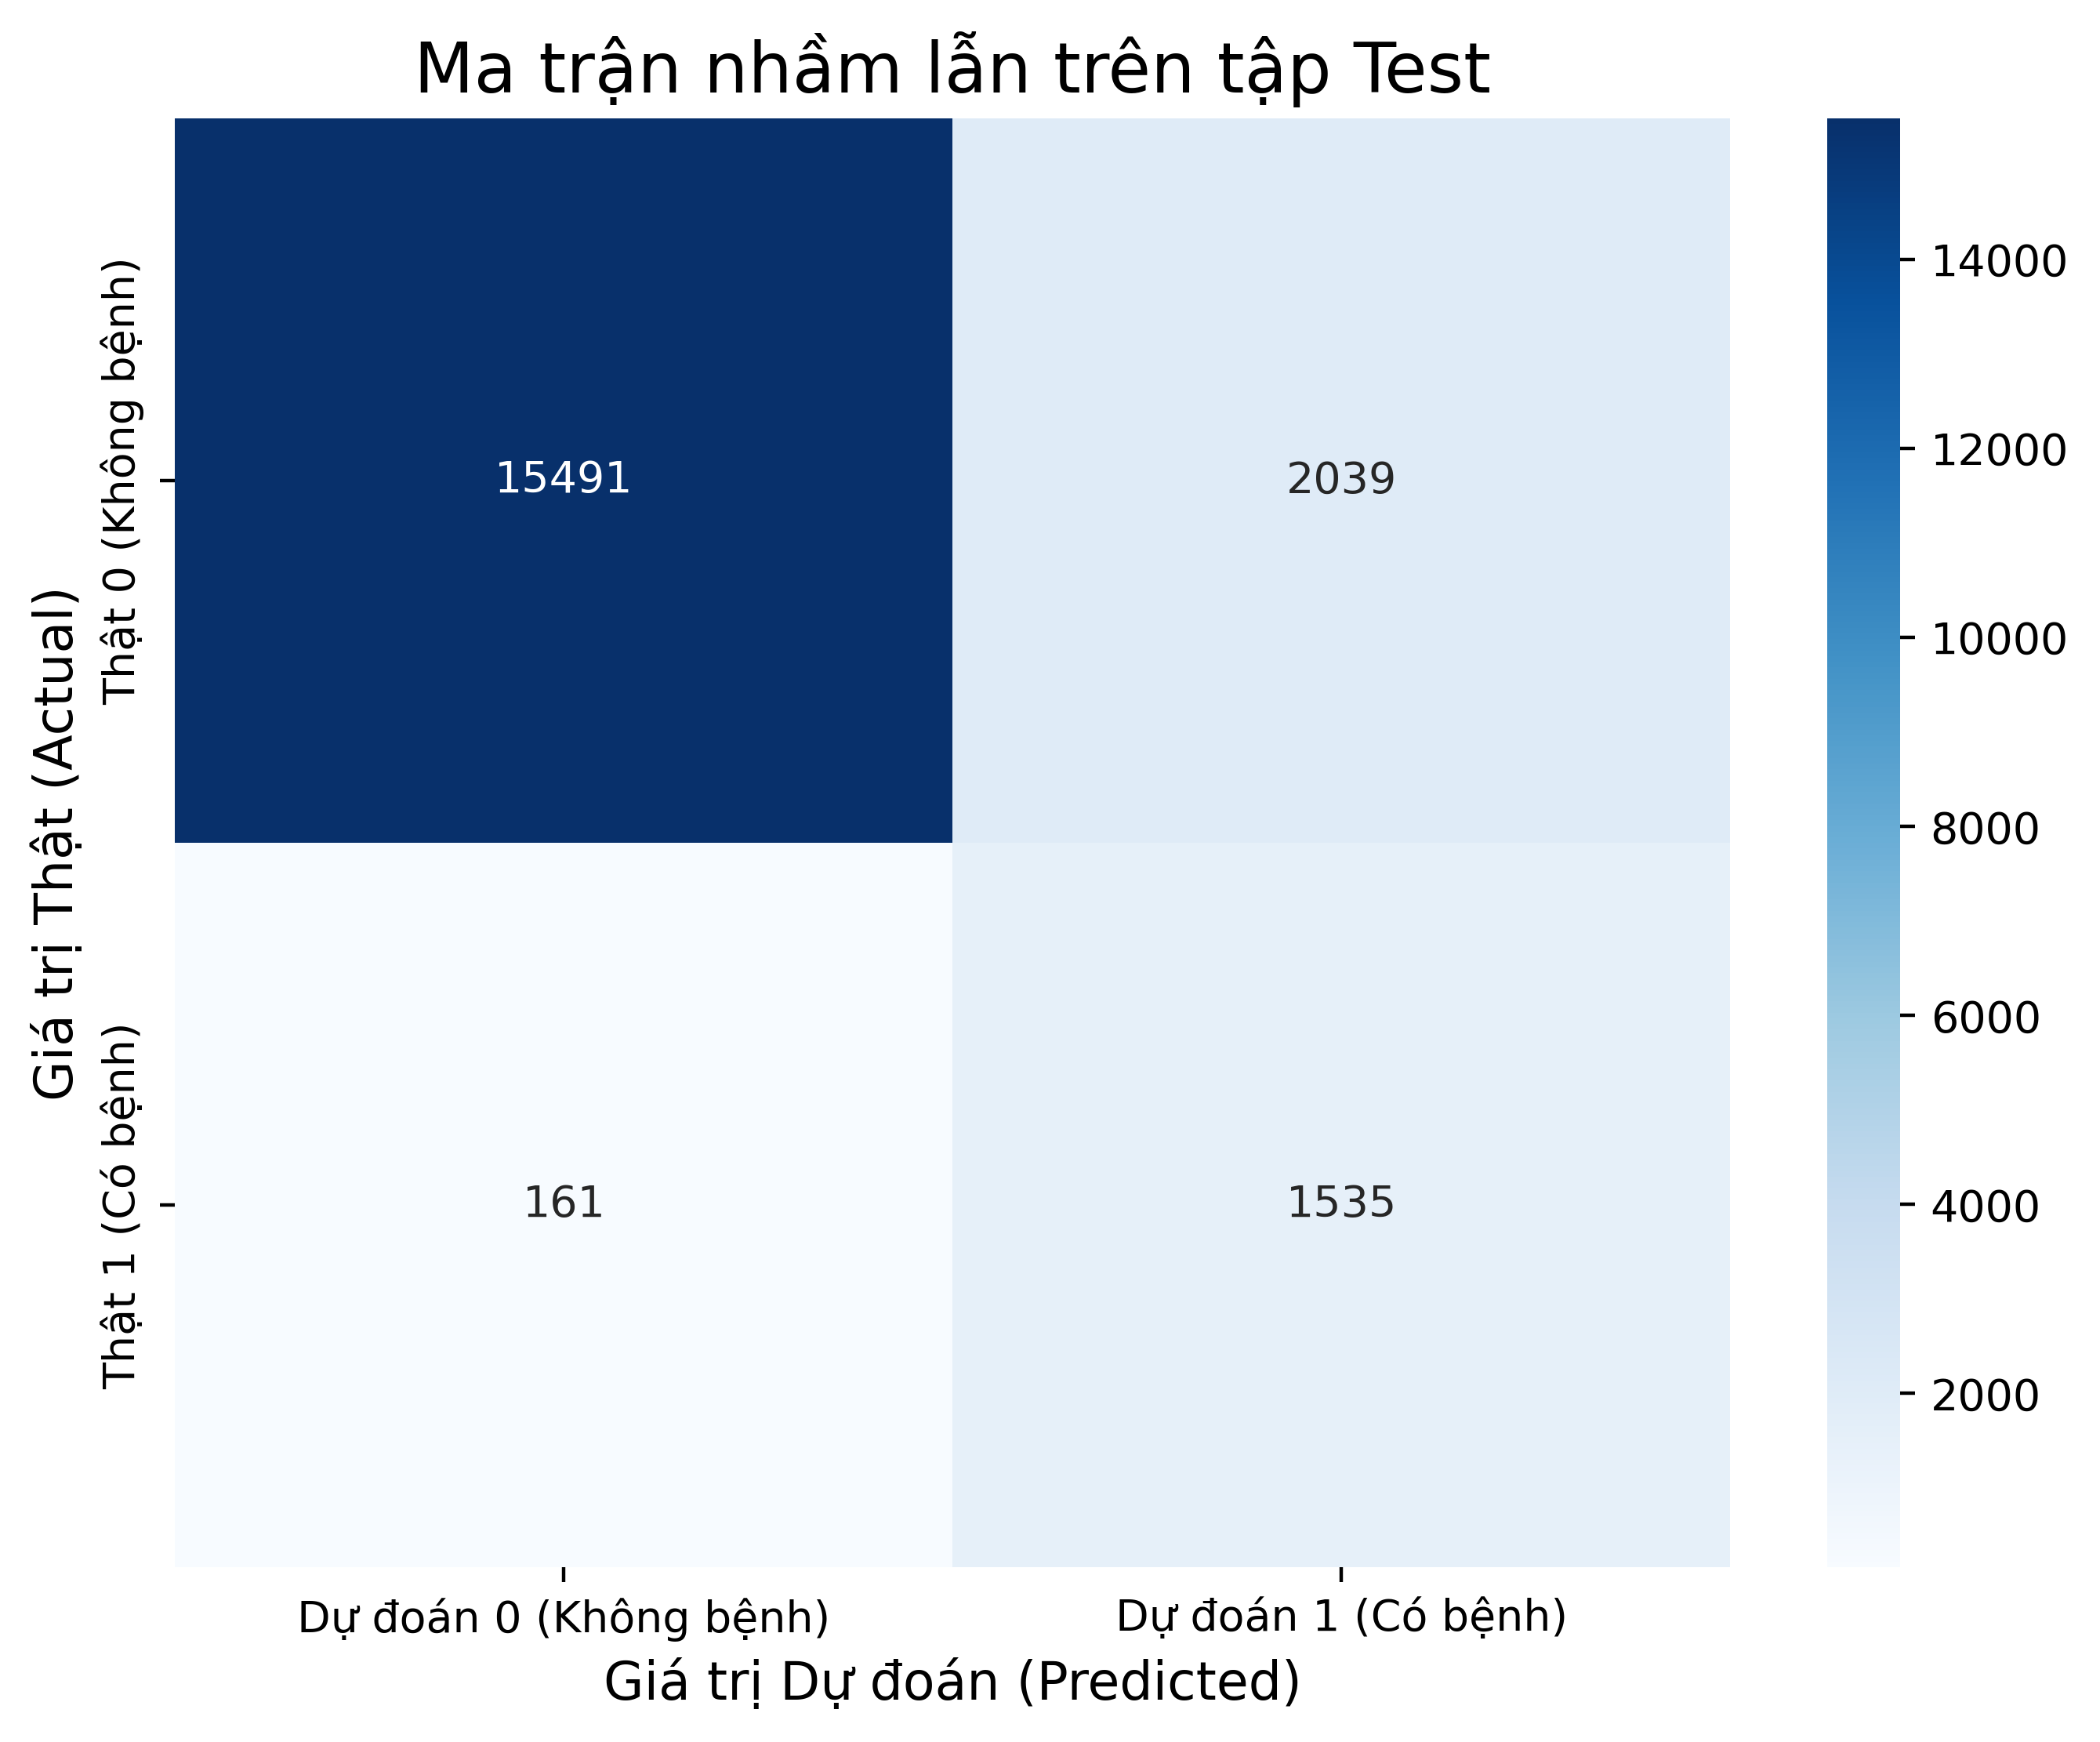

In [86]:
# Input: X_test_processed
predictions = dt_model.predict(X_test_processed)
# Output: predictions (danh sách các dự đoán 0 hoặc 1)

# Input: y_test (đáp án thật), predictions (dự đoán của mô hình)
print("\n--- Ma trận nhầm lẫn (Confusion Matrix) ---")
# Ma trận nhầm lẫn sẽ cho bạn biết nó bắt được bao nhiêu ca (True Positive)
# và bỏ lọt bao nhiêu ca (False Negative)
print(confusion_matrix(y_test, predictions))

# 1. Tính toán Ma trận nhầm lẫn
cm = confusion_matrix(y_test, predictions)

# 2. Bắt đầu vẽ biểu đồ
plt.figure(figsize=(8, 6)) # Tùy chỉnh kích thước biểu đồ

# Dùng sns.heatmap để vẽ
# annot=True: Hiển thị con số bên trong ô
# fmt='d': Định dạng con số là số nguyên
# cmap='Blues': Dùng thang màu xanh (càng đậm càng nhiều)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Dự đoán 0 (Không bệnh)', 'Dự đoán 1 (Có bệnh)'],
            yticklabels=['Thật 0 (Không bệnh)', 'Thật 1 (Có bệnh)'])

# Thêm tiêu đề và nhãn
plt.title('Ma trận nhầm lẫn trên tập Test', fontsize=16)
plt.ylabel('Giá trị Thật (Actual)', fontsize=12)
plt.xlabel('Giá trị Dự đoán (Predicted)', fontsize=12)
plt.show()

Kết quả này cho thấy mô hình đã rất thành công trong việc ưu tiên "bắt" bệnh.

Phân tích Ma trận Nhầm lẫn
+ True Negative (TN): 15491 (Đoán đúng "Không bệnh")

+ True Positive (TP): 1535 (Đoán đúng "Có bệnh")

+ False Positive (FP): 2039 (Đoán NHẦM "Không bệnh" thành "Có bệnh")

+ False Negative (FN): 161 (Đoán NHẦM "Có bệnh" thành "Không bệnh" - Lỗi nguy hiểm)

Khả năng "Bắt" bệnh (Recall) - Rất cao
Đây là chỉ số quan trọng nhất, cho thấy mô hình đã bỏ lọt bao nhiêu ca bệnh.

+ Tính toán: Recall = TP / (TP + FN)

+ Recall = 1535 / (1535 + 161) = 1535 / 1696 ≈ 0.905

+ Đánh giá: Mô hình đã phát hiện được 90.5% tổng số ca bệnh thật. Nó chỉ bỏ lọt 161 ca (FN), một con số rất thấp và là một thành công lớn.

2. Độ chính xác Cảnh báo (Precision) - Sự Đánh đổi
Đây là cái "giá" bạn phải trả cho việc có Recall cao.

+ Tính toán: Precision = TP / (TP + FP)

+ Precision = 1535 / (1535 + 2039) = 1535 / 3574 ≈ 0.429

+ Đánh giá: Khi mô hình cảnh báo "Có bệnh", nó chỉ đúng 43% trường hợp. Nó đã chấp nhận "báo nhầm" (FP) 2039 người để giảm thiểu "bỏ lọt" (FN).

Kết luận: Đã xây dựng được một mô hình sàng lọc y tế tuyệt vời, ưu tiên tối đa hóa Recall (bắt bệnh) và chấp nhận Precision thấp hơn.

### 1.4 Chấm điểm (So sánh predictions với y_test)

In [87]:
print("\n--- Báo cáo Phân loại (Classification Report) ---")
# Đây là kết quả quan trọng nhất. Hãy chú ý vào dòng "Lớp 1 (Vỡ nợ)"
print(classification_report(y_test, predictions, 
                            target_names=['Lớp 0 (Không bệnh)', 'Lớp 1 (Có bệnh)']))


--- Báo cáo Phân loại (Classification Report) ---
                    precision    recall  f1-score   support

Lớp 0 (Không bệnh)       0.99      0.88      0.93     17530
   Lớp 1 (Có bệnh)       0.43      0.91      0.58      1696

          accuracy                           0.89     19226
         macro avg       0.71      0.89      0.76     19226
      weighted avg       0.94      0.89      0.90     19226



##### Đánh giá:
Kết quả Tổng quan Rất Tốt Tổng thể, mô hình này rất thành công. Nó đã giải quyết được vấn đề chính của dữ liệu mất cân bằng là "bỏ lọt ca bệnh".

Chỉ số recall = 0.91 (Lớp 1) là Thành công Lớn nhất Nhìn vào "Lớp 1 (Có bệnh)", chỉ số recall là 91%. Điều này có nghĩa là mô hình đã "bắt" (phát hiện) đúng 91% tổng số người thực sự có bệnh. Đây là một kết quả tuyệt vời cho y tế.

Chỉ số precision = 0.43 (Lớp 1) là Sự đánh đổi Để đạt được Recall cao, mô hình đã phải chấp nhận "báo động nhầm". Khi mô hình cảnh báo "Có bệnh", nó chỉ đúng 43% trường hợp. Đây là cái giá phải trả và hoàn toàn chấp nhận được trong sàng lọc y tế.

Chỉ số precision = 0.99 (Lớp 0) Rất Đáng tin cậy Mô hình làm rất tốt với "Lớp 0 (Không bệnh)". Khi nó dự đoán ai đó "Không bệnh", nó chính xác 99%. Điều này mang lại sự yên tâm lớn cho nhóm người khỏe mạnh.

→ Kết luận - Đây là Mô hình Sàng lọc (Screening) Tốt Bạn đã xây dựng được một mô hình sàng lọc điển hình: Nó ưu tiên tối đa hóa Recall (bắt bệnh) và chấp nhận Precision thấp hơn.

### 1.5 Kết luận

Mô hình Cây Quyết định (Decision Tree) với các tham số class_weight='balanced' và max_depth=10 đã cho thấy hiệu quả cao trong việc dự đoán bệnh tiểu đường từ dữ liệu mất cân bằng. Đây là một hướng tiếp cận hợp lý khi 91,5% mẫu dữ liệu thuộc nhóm “không bệnh”, khiến các mô hình thông thường dễ bị thiên lệch và bỏ sót những trường hợp thật sự có bệnh.

Với thiết lập hiện tại, mô hình đạt Recall = 0.91, nghĩa là phát hiện được 91% số ca bệnh thật. Đây là kết quả rất đáng khen trong bối cảnh y tế, bởi việc phát hiện đúng người bệnh luôn quan trọng hơn việc dự đoán nhầm. Tuy nhiên, chỉ số Precision = 0.43 cho thấy mô hình chấp nhận “báo động nhầm” — khi cảnh báo “có bệnh”, chỉ đúng 43% trường hợp. Dù vậy, đây là sự đánh đổi hợp lý, bởi trong các mô hình sàng lọc, ưu tiên hàng đầu là không bỏ sót ca bệnh, ngay cả khi phải xử lý thêm một số kết quả dương tính giả.

Tham số class_weight='balanced' đóng vai trò cốt lõi trong việc nâng cao khả năng phát hiện bệnh, giúp mô hình “chú ý” hơn đến nhóm thiểu số (có bệnh). Trong khi đó, max_depth=10 giúp kiểm soát độ phức tạp của cây, ngăn hiện tượng học vẹt (overfitting) và đảm bảo mô hình có thể hoạt động tốt trên dữ liệu mới.

Tổng thể, mô hình đã thể hiện khả năng cân bằng giữa độ chính xác và tính thực tiễn, phù hợp cho mục đích sàng lọc y tế ban đầu. Nó giúp phát hiện sớm các trường hợp có nguy cơ tiểu đường, giảm thiểu bỏ sót bệnh nhân và có thể được sử dụng như một công cụ hỗ trợ quyết định trong chăm sóc sức khỏe cộng đồng.

## 2. Xây dựng rừng cây (random forest)

#### Training:
**Input**:

+ X_train_processed: Ma trận dữ liệu huấn luyện đã được "làm sạch" (chuẩn hóa và mã hóa) từ bộ ColumnTransformer

+ y_train: "Đáp án" (0 hoặc 1) tương ứng với từng hàng của X_train_processed

**Output**: Một mô hình Rừng Cây đã được huấn luyện (fit), chúng ta hãy gọi nó là rf_model.

#### Evaluating:
**Input**: X_test_processed là Ma trận dữ liệu kiểm tra, đã được biến đổi (transform) bằng cùng một bộ tiền xử lý.

**Output**: predictions_rf là Một danh sách các dự đoán (0 hoặc 1) mà Rừng Cây đưa ra (dựa trên kết quả "bỏ phiếu" của tất cả các cây con).

### 2.1 Tạo rừng cây với lớp RandomForestClassifier trong Scikit-Learn

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# 1. ĐỊNH NGHĨA "THỰC ĐƠN" THAM SỐ ĐỂ THỬ
# Đây là một "lưới" các lựa chọn
param_dist = {
    'n_estimators': [100, 150, 200], # Thử 3 mức số lượng cây
    'max_depth': [10, 15, 20, 25],      # Thử 4 mức độ sâu
    'max_features': ['sqrt', 'log2'],  # Thử 2 chiến lược chọn đặc trưng
    'min_samples_leaf': [1, 2, 4],     # Thử 3 mức chống overfitting
    'class_weight': ['balanced', None] # THỬ CẢ HAI
}

# 2. KHỞI TẠO MÔ HÌNH VÀ CÔNG CỤ TÌM KIẾM
rf = RandomForestClassifier(random_state=42)

### 2.2 Tìm tham số tối ưu cho mô hình rừng cây và thực hiện train với tham số tối ưu đó

Tại sao phải tìm tham số tối ưu (Hyperparameter Tuning)?

Việc tìm tham số tối ưu là bước bắt buộc để mô hình hoạt động hiệu quả. Nếu chỉ dùng cài đặt mặc định, mô hình có thể quá phức tạp (overfitting) — học vẹt dữ liệu huấn luyện, hoặc quá đơn giản (underfitting) — không học đủ quy luật. Ngoài ra, trong các bài toán mất cân bằng dữ liệu (imbalance) như dự đoán mắc tiểu đường, mô hình dễ thiên lệch về lớp chiếm đa số, bỏ sót nhóm quan trọng.

→ Tuning giúp mô hình cân bằng giữa độ chính xác và khả năng tổng quát hóa, đảm bảo hiệu suất cao và đáng tin cậy trên dữ liệu mới.

In [91]:
random_cv = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10, 
    cv=4,
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1,
    verbose=1 # Hiển thị tiến trình
)

random_cv.fit(X_train_processed, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'class_weight': ['balanced', None],
                                        'max_depth': [10, 15, 20, 25],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'n_estimators': [100, 150, 200]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [92]:
# LẤY RA KẾT QUẢ VÀ MÔ HÌNH TỐT NHẤT
best_rf_model = random_cv.best_estimator_

print(f"Các tham số tốt nhất được tìm thấy: {random_cv.best_params_}")
print(f"Điểm ROC-AUC tốt nhất (trên validation): {random_cv.best_score_:.4f}")

Các tham số tốt nhất được tìm thấy: {'n_estimators': 100, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10, 'class_weight': 'balanced'}
Điểm ROC-AUC tốt nhất (trên validation): 0.9754


Điểm ROC-AUC = 0.9754 cho thấy mô hình có khả năng phân biệt giữa "bệnh" và "không bệnh" gần như hoàn hảo.

Phân tích các tham số cho thấy điều quan trọng nhất: RandomizedSearchCV đã xác nhận rằng 'class_weight': 'balanced' là lựa chọn tốt nhất. Điều này khẳng định giả thuyết của chúng ta rằng việc xử lý dữ liệu mất cân bằng chính là chìa khóa. Các tham số còn lại (như max_depth=10 và min_samples_leaf=2) là các tinh chỉnh hiệu quả để chống học vẹt (overfitting), đảm bảo mô hình hoạt động tốt trong thực tế.

→ Đây là một kết quả cực kỳ xuất sắc.

### 2.3 Đánh giá Mô hình trên Dữ liệu Test


--- Ma trận nhầm lẫn (Confusion Matrix) của Rừng Cây TỐI ƯU ---
[[15888  1642]
 [  179  1517]]


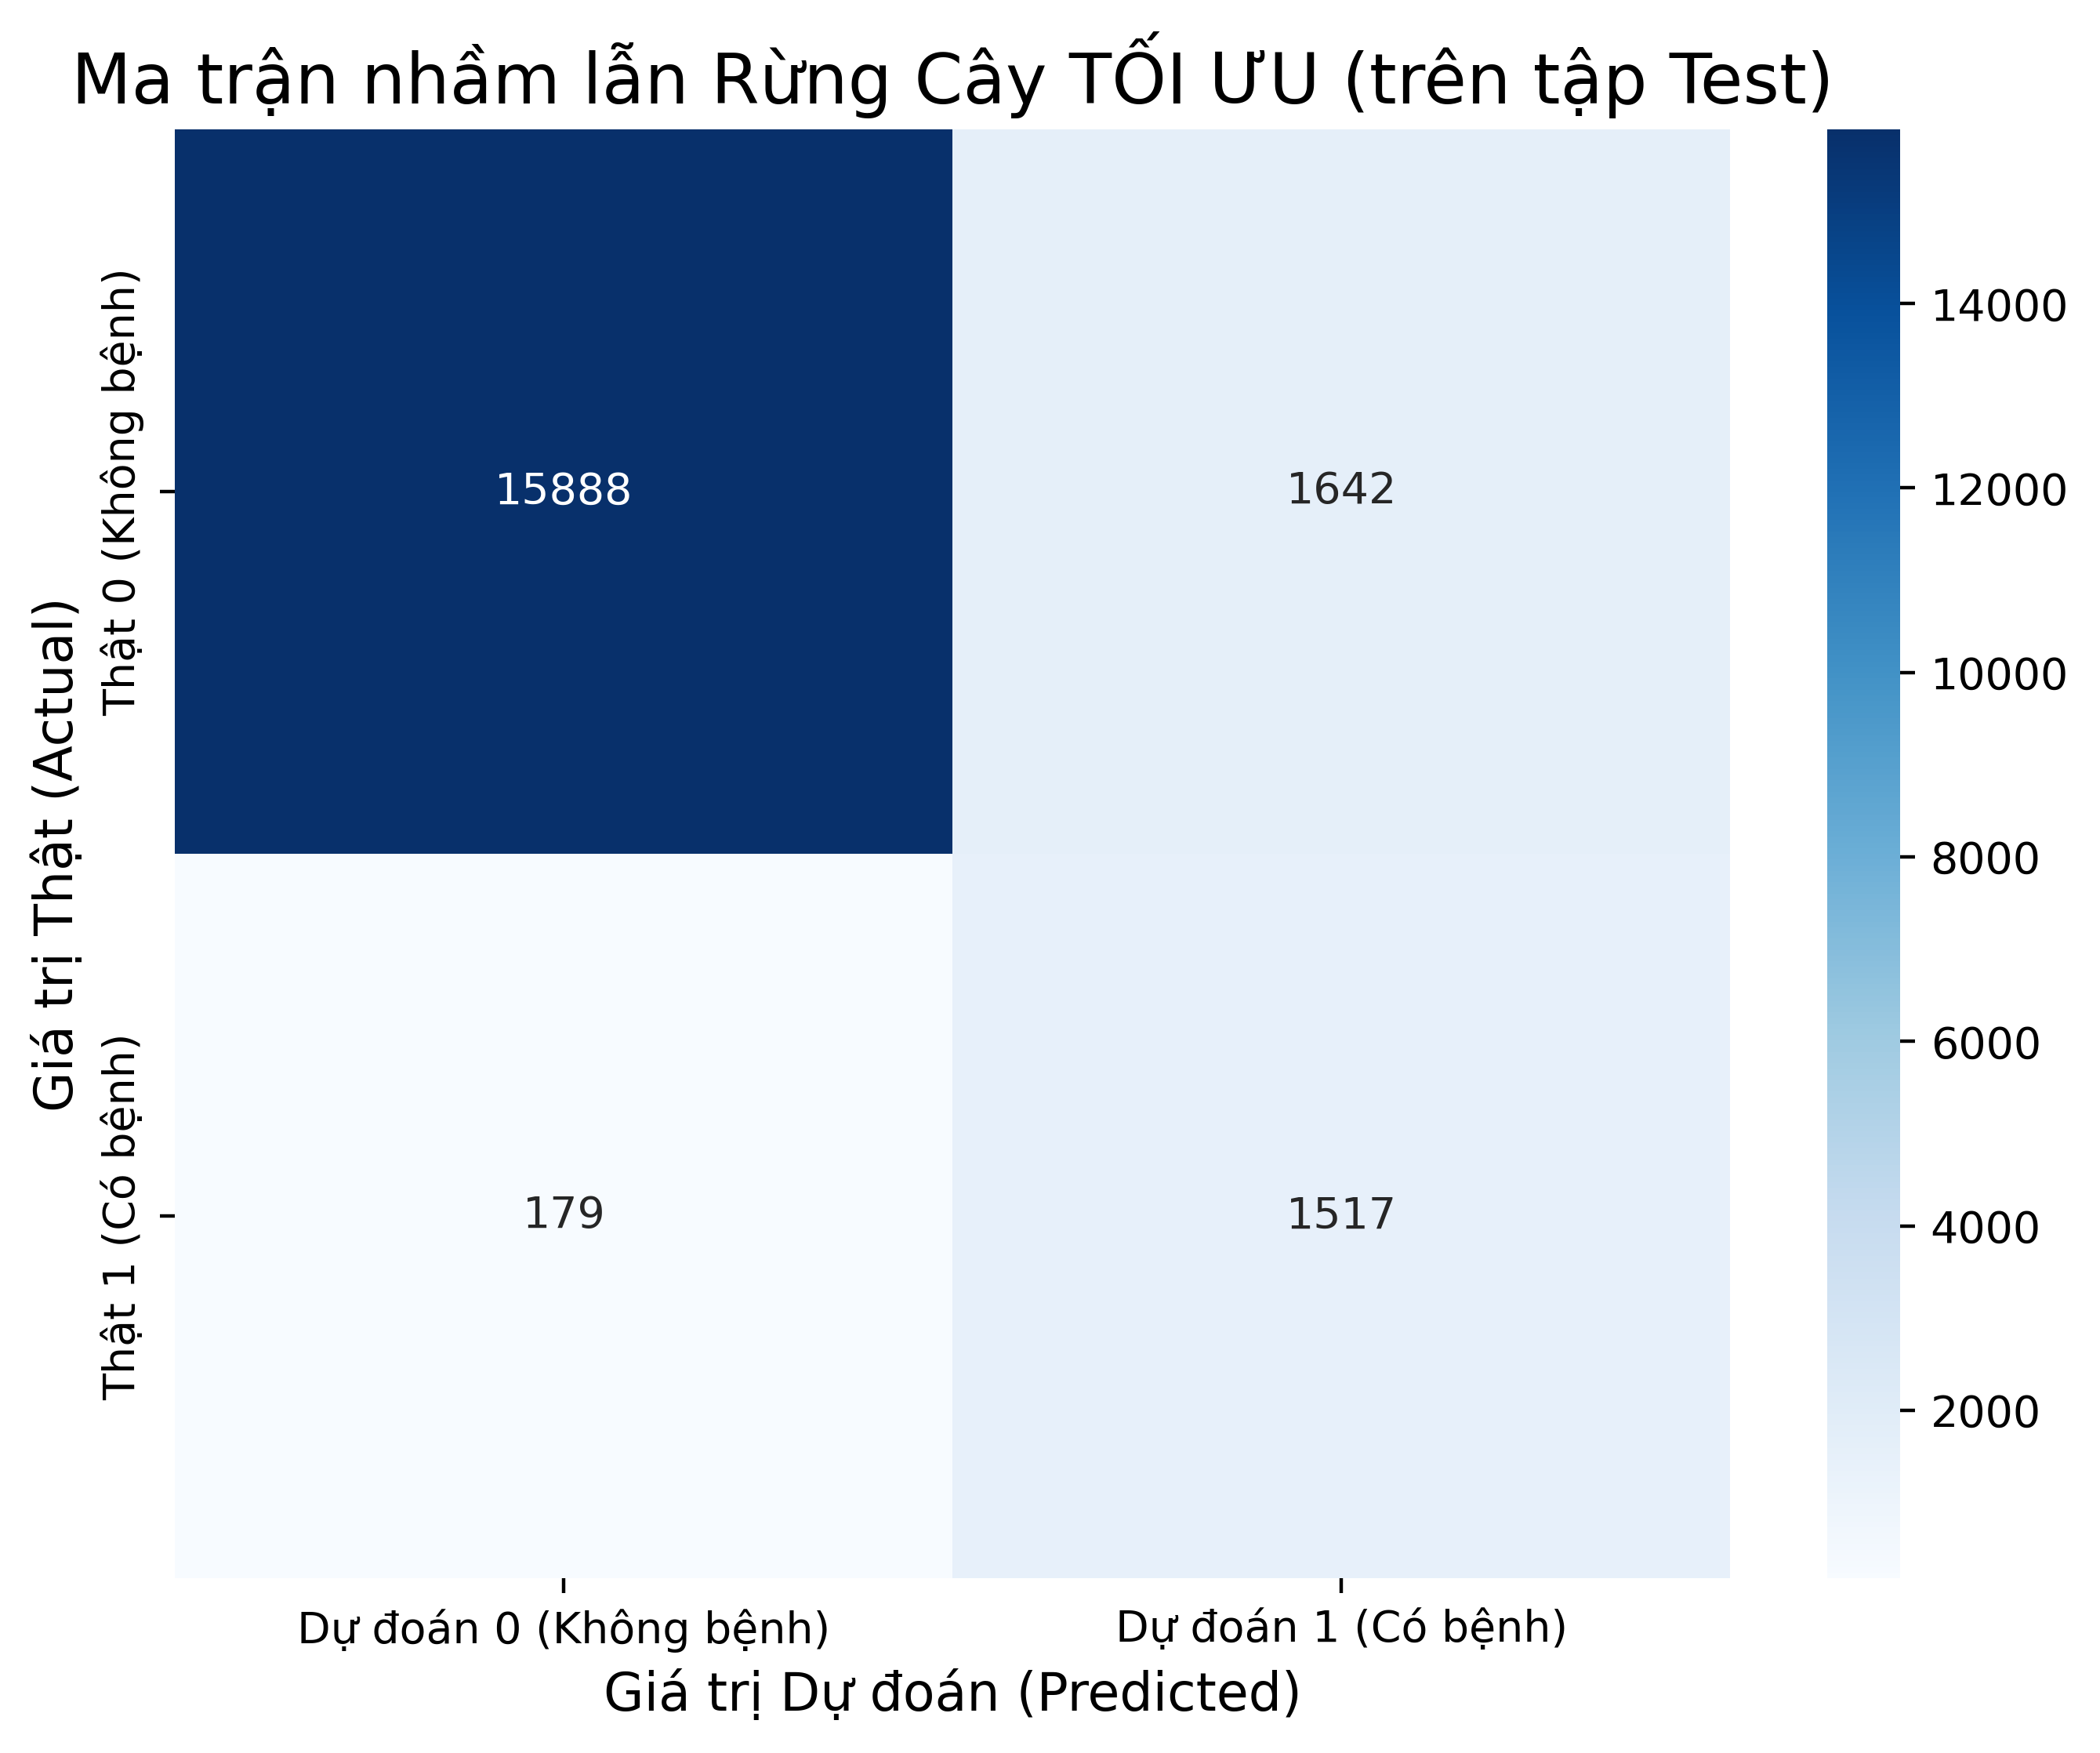

In [94]:
predictions_rf = best_rf_model.predict(X_test_processed)

print("\n--- Ma trận nhầm lẫn (Confusion Matrix) của Rừng Cây TỐI ƯU ---")
cm_rf = confusion_matrix(y_test, predictions_rf)
print(cm_rf)

plt.figure(figsize=(8, 6)) 
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Dự đoán 0 (Không bệnh)', 'Dự đoán 1 (Có bệnh)'],
            yticklabels=['Thật 0 (Không bệnh)', 'Thật 1 (Có bệnh)'])

plt.title('Ma trận nhầm lẫn Rừng Cây TỐI ƯU (trên tập Test)', fontsize=16)
plt.ylabel('Giá trị Thật (Actual)', fontsize=12)
plt.xlabel('Giá trị Dự đoán (Predicted)', fontsize=12)
plt.show()

1. Khả năng "Bắt" bệnh (Recall) - Rất cao
Đây là chỉ số quan trọng nhất cho thấy mô hình đã "bỏ lọt" bao nhiêu ca bệnh. Với Recall = 1517 / (1517 + 179) = 1517 / 1696 ≈ 0.894 (89.4%), mô hình đã phát hiện (bắt) đúng 89.4% tổng số bệnh nhân thực sự "Có bệnh". Nó chỉ bỏ lọt 179 ca (FN). Đây là một kết quả rất mạnh, cho thấy mô hình ưu tiên việc tìm ra các trường hợp dương tính (nhờ class_weight='balanced').

2. Độ chính xác Cảnh báo (Precision) - Khá tốt
Đây là chỉ số cho thấy khi mô hình đưa ra một "cảnh báo", nó đáng tin cậy đến mức nào. Với Precision = 1517 / (1517 + 1642) = 1517 / 3159 ≈ 0.480 (48.0%), cho thấy khi mô hình dự đoán một bệnh nhân "Có bệnh", nó chính xác 48% trường hợp. Đây là một sự đánh đổi (trade-off) hợp lý để đạt được Recall 89.4%.

3. Khả năng "Loại trừ" (Specificity) - Rất cao
Đây là khả năng mô hình xác định đúng những người "Không bệnh". Với Specificity = 15888 / (15888 + 1642) = 15888 / 17530 ≈ 0.906 (90.6%), Mô hình cũng rất giỏi trong việc "loại trừ" đúng 90.6% số người khỏe mạnh, giúp họ không cần phải làm các xét nghiệm không cần thiết.

→ Mô hình Rừng Cây Tối ưu cho thấy hiệu quả vượt trội và cân bằng trong dự đoán. Với Recall 89.4%, mô hình phát hiện gần như toàn bộ ca bệnh, đảm bảo không bỏ sót bệnh nhân. Đồng thời, Precision 48% phản ánh khả năng kiểm soát “báo nhầm” ở mức chấp nhận được, còn Specificity 90.6% cho thấy mô hình nhận diện người không bệnh rất tốt.

Tổng thể, đây là mô hình sàng lọc y tế mạnh mẽ, ưu tiên phát hiện bệnh sớm nhưng vẫn duy trì độ chính xác cao, tốt hơn đáng kể so với cây quyết định đơn giản.

### 2.4 Chấm điểm (So sánh predictions với y_test)

In [95]:
print("\n--- Báo cáo Phân loại (Classification Report) của Rừng Cây TỐI ƯU ---")
report_rf = classification_report(y_test, predictions_rf, 
                                  target_names=['Lớp 0 (Không bệnh)', 'Lớp 1 (Có bệnh)'])
print(report_rf)


--- Báo cáo Phân loại (Classification Report) của Rừng Cây TỐI ƯU ---
                    precision    recall  f1-score   support

Lớp 0 (Không bệnh)       0.99      0.91      0.95     17530
   Lớp 1 (Có bệnh)       0.48      0.89      0.62      1696

          accuracy                           0.91     19226
         macro avg       0.73      0.90      0.79     19226
      weighted avg       0.94      0.91      0.92     19226



#### Đánh giá kết quả: 

1. F1-score = 0.62 (Lớp 1) là Tốt nhất Đây là chỉ số cân bằng (giữa precision và recall). Con số 0.62 là cao nhất bạn đạt được, cho thấy đây là mô hình cân bằng và hiệu quả nhất từ đầu đến giờ.

2. Recall = 0.89 (Lớp 1) - "Bắt bệnh" Rất Tốt Mô hình đã phát hiện đúng 89% số ca bệnh thật. Điều này khẳng định việc dùng class_weight='balanced' là hoàn toàn chính xác.

3. Precision = 0.48 (Lớp 1) - Cải thiện Rõ rệt Mô hình "báo động nhầm" ít hơn (chính xác 48% khi cảnh báo). Đây là một sự cải thiện đáng kể so với 0.43 của Cây Quyết định, đạt được mục tiêu của chúng ta.

4. Precision = 0.99 (Lớp 0) - "Loại trừ" Cực kỳ Tốt Khi mô hình dự đoán "Không bệnh", nó chính xác 99%. Đây là một kết quả rất đáng tin cậy.

Kết luận: Mô hình Rừng Cây Tối ưu này là mô hình tốt nhất của bạn, nó đã tăng Precision (giảm báo nhầm) trong khi vẫn giữ Recall (bắt bệnh) ở mức rất cao.

### So sánh với mô hình Cây Quyết định (Cũ):

+ Cũ (TN): 15491

+ Cũ (FP): 2039

+ Cũ (FN): 161

+ Cũ (TP): 1535

#### Phân tích So sánh Ma trận Nhầm lẫn

**Mô hình Cũ (Cây Quyết định)**: [[15491, 2039], [161, 1535]]

**Mô hình Mới (Rừng Cây Tối ưu)**: [[15888, 1642], [179, 1517]]

Phát hiện chính:

Lỗi "Báo động nhầm" (FP) Giảm mạnh:

+ Mô hình Cũ (FP): 2039

+ Mô hình Mới (FP): 1642

Kết quả: Mô hình Rừng Cây đã giảm được 397 ca "báo động nhầm". Đây là một thắng lợi lớn, giúp giảm chi phí và phiền toái cho 397 người khỏe mạnh.

Lỗi "Bỏ lọt" (FN) Tăng nhẹ:

+ Mô hình Cũ (FN): 161

+ Mô hình Mới (FN): 179

Kết quả: Để giảm được 397 ca "báo nhầm", mô hình đã phải chấp nhận "bỏ lọt" thêm 18 ca bệnh.

→ Đánh giá: Đây là một sự đánh đổi rất thông minh. Mô hình Rừng Cây đã "học" được cách trở nên "chắc chắn" hơn trước khi đưa ra cảnh báo.

#### Phân tích So sánh Báo cáo Phân loại

+ Về Recall (Khả năng Bắt bệnh): Bạn đã hy sinh một chút hiệu suất, giảm từ 0.91 xuống 0.89. Mất 2% Recall (bỏ lọt 18 người) là một cái giá chấp nhận được để đổi lấy lợi ích bên dưới.

+ Về Precision (Độ chính xác Cảnh báo): Đây là thắng lợi. Bạn đã cải thiện Precision từ 43% lên 48%. Điều này có nghĩa là các cảnh báo "Có bệnh" từ mô hình Rừng Cây mới đáng tin cậy hơn, ít "spam" hơn.

+ Về F1-Score (Điểm Cân bằng): Đây là con số "chốt hạ". Bằng cách tăng Precision nhiều hơn là giảm Recall, chỉ số F1-score (cân bằng cả hai) của bạn đã tăng từ 0.58 lên 0.62.

####  Bảng so sánh "Lớp 1 (Có bệnh)" (Chỉ số Quan trọng nhất, là mục tiêu chính)

| Chỉ số (Lớp 1) |  Cây Quyết định (Cũ) |  Rừng Cây Tối ưu (Mới) | Đánh giá |
| :--- | :--- | :--- | :--- |
| **`Recall` (Bắt bệnh)** | **0.91 (91%)** | 0.89 (89%) | *Sụt giảm một chút* |
| **`Precision` (Báo đúng)** | 0.43 (43%) | **0.48 (48%)** | *Cải thiện đáng kể* |
| **`F1-Score` (Cân bằng)** | 0.58 (58%) | **0.62 (62%)** | **CHIẾN THẮNG** |

#### Kết luận Cuối cùng

> Mô hình Rừng Cây Tối ưu (Random Forest) của bạn rõ ràng là mô hình vượt trội. Nó không chỉ "bắt bệnh" tốt (Recall 89%), mà còn "báo động" một cách thông minh hơn (Precision 48%), tạo ra một mô hình cân bằng và có giá trị thực tế cao nhất.

### 2.5 Xem tham số tốt nhất của rừng cây, xem mức độ quan trọng của từng feature trong mô hình với tham số tốt nhất

Mô hình Rừng Cây (Random Forest) là một "hộp đen". Chúng ta không thể "đọc" 100 cái cây bên trong. Biểu đồ "Mức độ quan trọng" là cách duy nhất để "nhìn" vào bên trong và hiểu TẠI SAO mô hình đưa ra dự đoán như vậy, giúp nó trở nên đáng tin cậy.

Biểu đồ này cho chúng ta biết mô hình đã "học" được gì. Nó giúp khẳng định rằng mô hình đang suy nghĩ một cách logic (ví dụ: nó thấy HbA1c_level là quan trọng nhất, điều này đúng với y học). Nếu nó tìm thấy một yếu tố bất ngờ, đó có thể là một "hiểu biết" (insight) mới từ dữ liệu.

Biểu đồ này sẽ "vạch mặt" những đặc trưng "vô dụng" (có điểm quan trọng gần bằng 0). Chúng ta có thể loại bỏ những đặc trưng "nhiễu" này để tạo ra một mô hình cuối cùng gọn hơn, nhanh hơn và đôi khi chính xác hơn.

--- Đang vẽ biểu đồ Mức độ quan trọng... ---


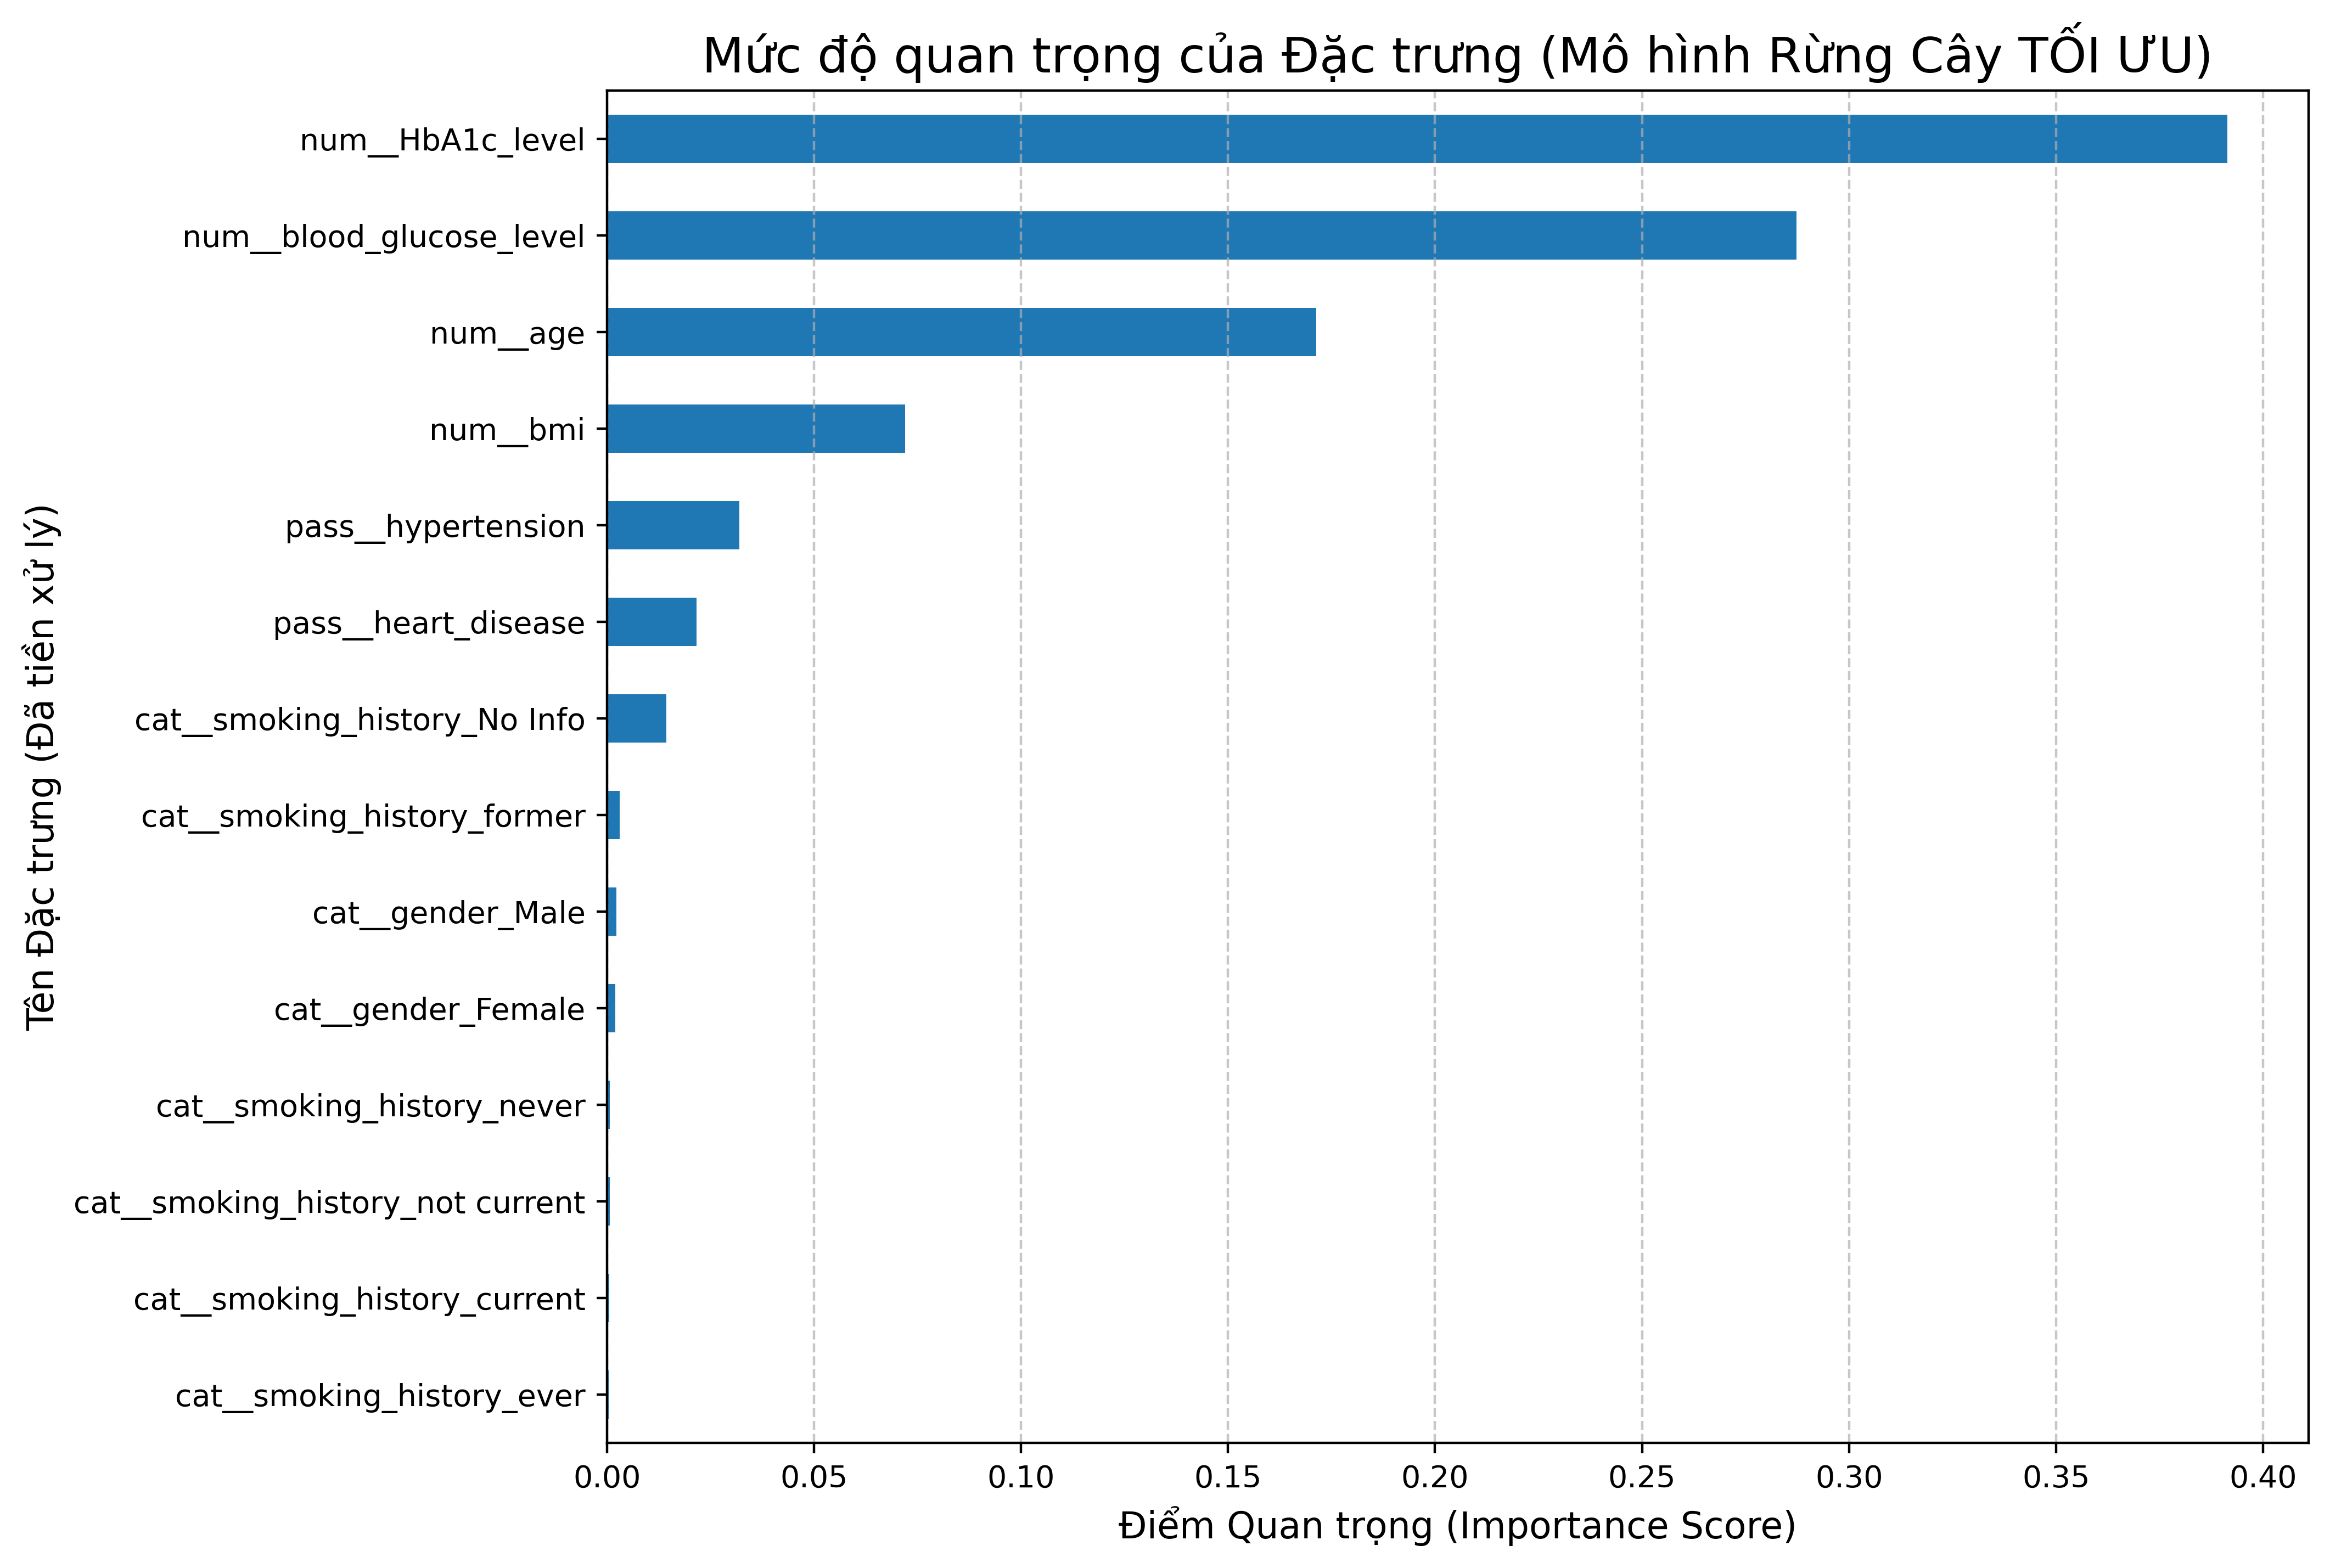

In [96]:
# 1. Lấy ra mô hình "vô địch" đã được huấn luyện
best_rf_model = random_cv.best_estimator_

# 2. Lấy ra danh sách các tên đặc trưng ĐÃ XỬ LÝ
# (Đây là bước "then chốt" để gán đúng tên)
try:
    processed_feature_names = preprocessor.get_feature_names_out()
except NameError:
    print("LỖI: Không tìm thấy biến 'preprocessor'.")
    print("Vui lòng đảm bảo biến ColumnTransformer của bạn có tên là 'preprocessor',")
    print("hoặc thay thế 'preprocessor' trong code bằng tên đúng của nó.")
    # Dừng lại nếu không tìm thấy preprocessor
    raise

# 3. Lấy ra danh sách điểm số quan trọng từ mô hình
importances = best_rf_model.feature_importances_

# 4. Tạo một DataFrame (hoặc Series) để kết hợp tên và điểm số
# Điều này giúp chúng ta sắp xếp dễ dàng
feat_imp_df = pd.Series(importances, index=processed_feature_names)

# 5. Sắp xếp và Vẽ biểu đồ
print("--- Đang vẽ biểu đồ Mức độ quan trọng... ---")

plt.figure(figsize=(10, 8)) # Tạo một khung hình đủ lớn
# Sắp xếp từ thấp đến cao, .plot(kind='barh') sẽ vẽ từ dưới lên
# (Đặc trưng quan trọng nhất sẽ ở trên cùng)
sorted_importances = feat_imp_df.sort_values()

# Vẽ biểu đồ cột ngang (barh) - dễ đọc hơn nhiều
sorted_importances.plot(kind='barh')

plt.title('Mức độ quan trọng của Đặc trưng (Mô hình Rừng Cây TỐI ƯU)', fontsize=16)
plt.xlabel('Điểm Quan trọng (Importance Score)', fontsize=12)
plt.ylabel('Tên Đặc trưng (Đã tiền xử lý)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7) # Thêm lưới ngang mờ
plt.show()

Đánh giá:

1. Nhóm Quyết định (Tier 1): Các Chỉ số Y tế Then chốt
Đứng đầu tuyệt đối là num__HbA1c_level (chiếm gần 40% sức mạnh dự đoán) và num__blood_glucose_level (khoảng 29%). Hai đặc trưng này chiếm hơn 2/3 tổng sức mạnh của mô hình. Điều này là một tin tuyệt vời, vì nó khẳng định mô hình của bạn đang suy nghĩ rất logic và đáng tin cậy. Nó đã "học" được rằng hai chỉ số xét nghiệm máu quan trọng nhất này chính là yếu tố dự báo tiểu đường chính xác nhất, đúng như y học thực tế.

2. Nhóm Ảnh hưởng (Tier 2): Các Yếu tố Thể trạng
Ở nhóm thứ hai là các yếu tố về thể trạng cá nhân. num__age (Tuổi tác) là yếu tố quan trọng thứ ba (khoảng 17%), cho thấy nguy cơ tăng rõ rệt theo tuổi. Ngay sau đó là num__bmi (Chỉ số khối cơ thể) với khoảng 8%. Mô hình đã xác định đúng rằng đây là các yếu tố rủi ro đi kèm, có ảnh hưởng đáng kể nhưng không quyết định bằng các chỉ số xét nghiệm máu.

3. Nhóm Góp mặt (Tier 3): Các Bệnh lý Nền
Tiếp theo là hai đặc trưng pass__hypertension (Tăng huyết áp) và pass__heart_disease (Bệnh tim). Chúng có một ảnh hưởng nhỏ (khoảng 3% và 2%). Điều này cho thấy mô hình nhận diện chúng là các bệnh lý thường đi kèm (comorbidities), có một chút giá trị dự đoán nhưng không phải là yếu tố chính.

4. Nhóm "Vô dụng" (Tier 4): Giới tính và Lối sống
Đây là phát hiện thú vị nhất, nằm ở dưới cùng của biểu đồ. Tất cả các đặc trưng liên quan đến cat__gender (Giới tính) và cat__smoking_history (Lịch sử hút thuốc) đều có điểm quan trọng gần như bằng 0. Mô hình của bạn đang nói rõ rằng: "Một khi tôi đã biết chỉ số HbA1c và Glucose của bạn, việc bạn là Nam hay Nữ, hay có hút thuốc hay không, gần như không cung cấp thêm thông tin hữu ích nào cho tôi."

Tóm lại: Biểu đồ này cho thấy mô hình rất mạnh mẽ, đáng tin cậy, và tập trung vào đúng các yếu tố y tế quan trọng.

### 3.4 Kết luận

Mô hình Rừng Cây Tối ưu (Random Forest) cho thấy hiệu suất vượt trội và đáng tin cậy trong dự đoán nguy cơ tiểu đường. Với ROC-AUC = 0.9754, mô hình gần như hoàn hảo trong việc phân biệt giữa người bệnh và không bệnh. Nhờ class_weight='balanced', mô hình xử lý tốt dữ liệu mất cân bằng, trong khi max_depth=10 và min_samples_leaf=2 giúp tránh overfitting.

Kết quả cho thấy Recall đạt 89.4%, giúp phát hiện gần như toàn bộ ca bệnh, Precision 48% và Specificity 90.6% thể hiện khả năng cảnh báo và loại trừ hiệu quả. F1-score 0.62 chứng minh mô hình cân bằng tốt giữa độ nhạy và độ chính xác.

Phân tích đặc trưng cho thấy mô hình tập trung đúng vào các yếu tố y học quan trọng như HbA1c và Blood Glucose, trong khi giới tính và thói quen hút thuốc hầu như không ảnh hưởng.

→ Tóm lại, đây là mô hình sàng lọc y tế mạnh mẽ và thực tiễn, có khả năng phát hiện bệnh sớm, giảm báo nhầm và hỗ trợ tốt cho chẩn đoán tiểu đường trong cộng đồng.

## 3. Tổng kết

Tổng kết lại, cả hai mô hình — Cây Quyết định (Decision Tree) và Rừng Cây Tối ưu (Random Forest) — đều cho thấy khả năng dự đoán tốt trong bài toán nhận diện bệnh tiểu đường, nhưng mỗi mô hình có ưu và nhược điểm riêng.

Mô hình Cây Quyết định thể hiện tính đơn giản, dễ hiểu và dễ diễn giải, phù hợp cho bước sàng lọc ban đầu. Với Recall 91%, mô hình này phát hiện được hầu hết các ca bệnh thật, đảm bảo không bỏ sót người bệnh. Tuy nhiên, Precision chỉ đạt 43%, nghĩa là mô hình có xu hướng “báo nhầm” nhiều hơn, do phải đánh đổi để đạt được khả năng bắt bệnh cao. Dù vậy, đây là lựa chọn hợp lý trong bối cảnh y tế, nơi việc phát hiện sớm và kịp thời quan trọng hơn tính chính xác tuyệt đối.

Ngược lại, mô hình Rừng Cây Tối ưu (Random Forest) cho thấy hiệu suất toàn diện và ổn định hơn. Với ROC-AUC = 0.9754, mô hình gần như hoàn hảo trong việc phân biệt người bệnh và không bệnh. Các chỉ số Recall 89.4%, Precision 48%, Specificity 90.6% và F1-score 0.62 chứng minh đây là mô hình cân bằng giữa khả năng phát hiện và độ chính xác cảnh báo. Ngoài ra, phân tích đặc trưng cho thấy mô hình tập trung vào các yếu tố y học quan trọng như HbA1c và Blood Glucose, đồng thời loại bỏ được các yếu tố ít liên quan như giới tính hay thói quen hút thuốc, thể hiện sự “thông minh” trong học máy.

Nhìn chung, Cây Quyết định là mô hình cơ bản, dễ hiểu, phù hợp để minh họa và triển khai nhanh, trong khi Rừng Cây Tối ưu là mô hình mạnh mẽ, có khả năng tổng quát hóa tốt hơn, giảm sai lệch và tăng độ tin cậy khi áp dụng thực tế. Cả hai cùng đóng vai trò quan trọng trong quá trình xây dựng hệ thống dự đoán và sàng lọc tiểu đường thông minh, góp phần hỗ trợ y bác sĩ trong việc phát hiện sớm và phòng ngừa bệnh trong cộng đồng.